# CS 449 Deep Learning Homework 1

This assignment is due Tuesday, January 24 at 11:59pm Central Time. It is worth approximately 8% of your final grade.

While the project and some future assignments may be completed in groups, this assignment **must be completed alone**. Do not submit someone else's work as your own, and do not allow someone else to submit your work as their own.

To submit this assignment, you should commit to your GitHub account:

* your Net ID in the `netid` file. Please do not put your name in your notebook; we will grade these anonymously.

* a `hw1.pdf` printout of the completed notebook that shows all your answers. 

* your final `hw1.ipynb` notebook with outputs saved. If we run your notebook from scratch, it should produce an output identical to your PDF. You can edit your notebook however you want (on Colab, on your local machine, somewhere else); just upload the latest version of it to GitHub.

Your GitHub account must submit contain all three of these, or you will lose points. We will not accept late work except in extreme settings.


# Question 1: Loss functions (10 points)

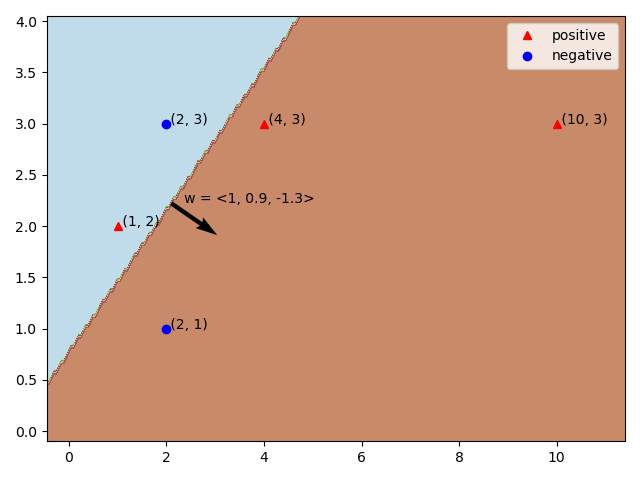

Consider the linear classifier with the weights and decision boundary above. Define $g({\bf x}) =  {\bf w}^\top {\bf x}$. We'll define our classification prediction $h({\bf X}) = \text{sign}(g({\bf X}))$. Using the parameters $\mathbf{w} = \langle 1, 0.9, -1.3 \rangle$ shown above, we can calculate $g(X)$ and $h(X)$ as:

$\begin{array}{c r r r}
{\bf X} & y & g({\bf X}) & h({\bf X}) \\
\hline
(1, 2) &  1  & -0.7 &  -1 \\
(2, 1) &  -1 & 1.5  &  1   \\
(2, 3) &  -1 & -1.1 &  -1  \\
(4, 3) &  1  & 0.7  &  1   \\
(10, 3)&  1  & 6.1  &  1 
\end{array}$

Right now, the classifier gets 60% accuracy. We want to think about how different loss functions could help the model improve.

In class, we've discussed the perceptron loss and mean squared error as ways of evaluating the quality of model predictions. First, read up on [Hinge loss](https://en.wikipedia.org/wiki/Hinge_loss) and [Binary Cross Entropy loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) to understand how those work. We include definitions below, but it'll be helpful to understand the "margin" aspect of hinge loss and the probabilistic interpretation of BCE loss.

Using our $g({\bf X})$ definition above, we can define each loss as the following:

1. Perceptron (zero-one) loss:

$L(x, y) = \begin{cases}
0 & \text{if } y \cdot g({\bf x}) > 0 \\
1 & \text{otherwise} 
\end{cases} \\[2em]$

2. Squared error loss:

$L(x, y) = (y - g({\bf x}))^2 \\[2em]$

3. Binary cross-entropy loss (written in an atypical way):

$L(x, y) = \begin{cases}
\ln\left(1 + \exp(-g({\bf x}))\right) & \text{ if } y > 0 \\
\ln\left(1 + \exp(g({\bf x}))\right) & \text{ if } y < 0
\end{cases} \\[2em]$

4. Hinge loss:

$L(x, y) = \max\left(0, 1 - y \cdot g({\bf x})\right) \\[1em]$

For each loss, answer the following questions. You must provide an explanation for full points.

 - a. Which points have the highest loss value? Why?

 - b. Which points have the lowest loss value? Why?

 - c. Is there a different set of parameters ${\bf w'}$ that would have a lower total loss across all five points? How can you tell? If you're not sure, explain why it's hard to tell. You shouldn't need to walk through the calculations.

 - d. If we could find a different set of parameters with a lower loss value, are those parameters *guaranteed* to produce a model with accuracy greater than 60%? Why or why not?

 - e. Is this a good loss function for our task of binary classification? Why or why not?

### *Please add your answers into the structure below. You shouldn't need to write or run code for these answers.*

1. Perceptron loss

  a. Points (1,2) and (2,1) have the highest loss value because it is 1.  

  b. Points (2,3), (4,3) and (10,3) have the lowest loss value because it is 0.  

  c. Yes. Now we have 2 mis-classified points, if we choose a w', separating these five into two groups(one of it only contains (2,3)), it will be better because we will only have one mis-classified point(2,1).  

  d. Yes. Let the blue region only cover (1,2), the total loss will be the lowest, and the accuracy can achieve 80%.  

  e. No, it is not a good loss function, because it is not convex.

2. Squared error loss

  a. Points (10,3) has the highest loss value because it is 26.01. 

  b. Points (2,3) has the lowest loss value because it is 0.01. 

  c. Yes, according to regression analysis, it is not the optimal solution intuitively, because the points are not evenly distributed on either side of the line.

  d. w = [-0.9, 0.1, 0.3] is the optimal solution, it will guaranteeto produce a model with accuracy exactly 60%.

  e. No. Though it is convex, I take (10,3) for example, though it is a correct classified point, this point is a outlier and has the highest loss value.

3. Binary cross entropy loss

  a. Points (2,1) has the highest loss value because it is 1.701.  

  b. Points (10,3) has the lowest loss value because it is 0.002.   

  c. For the w = [-0.9, 0.1, 0.3] mentioned above, we have a smaller total loss 2.94 in contrast with 3.50. But Intuitively, without calculation, I can't tell, it is hard to know a better one from the observation.

  d. It's the same as 2.d, the w corresponds to a smaller total loss, but with exactly 60% accuracy.

  e. Yes. It reflects larger loss on the wrong classified points. It is also easy to find a good solution.


4. Hinge loss

  a. Points (2,1) has the highest loss value because it is 2.5.  

  b. Points (2,3) and (10,3) have the lowest loss value because it is 0.

  c. For the w = [-0.9, 0.1, 0.3] mentioned above, we have a smaller total loss 3.6 in contrast with 4.5. But Intuitively, without calculation, I can't tell, it is hard to know a better one from the observation.

  d. It's the same as 2.d, the w corresponds to a smaller total loss, but with exactly 60% accuracy.

  e. Yes. It reflects larger loss on the wrong classified points. It is also easy to find a good solution.

# Question 2: Experiments with Pretraining (10 points)

## Code setup

Read through the code below to get a sense of how we're setting up these experiments.

Then, you can run all the cells. The questions you need to answer are found at the bottom of the notebook. 

In [24]:
# helper code from the course repository
!cd /content && git clone -q https://github.com/zachwooddoughty/cs449w23.git
# install common pacakges used for deep learning
!cd /content/cs449w23/ && pip install -q -r requirements.txt

# this "magic" command makes graphics produced by matplotlib appear
%matplotlib inline

# make sure we're in the right directory
%cd /content/cs449w23/
# pull any updates
!git pull -q origin main

import torch
import numpy as np

import copy
import random

from collections import defaultdict
from sklearn.model_selection import train_test_split
from utils.plotting import *  # see plotting.py for plotting utilities

/bin/bash: line 0: cd: /content: No such file or directory
/bin/bash: line 0: cd: /content/cs449w23/: No such file or directory
[Errno 2] No such file or directory: '/content/cs449w23/'
/Users/galahad/Desktop/NU/Deep_Learning/Codes/HWs/HW1
fatal: not a git repository (or any of the parent directories): .git


In [25]:
# Create two datasets

def make_multiple_circles(radii, examples_per_ring, std=0.1,):
    """
    A dataset of concentric circles of alternating labels
    """
    assert type(radii) in [list, tuple, np.ndarray]

    X = np.zeros([0, 2])
    y = np.zeros([0,])

    for i, radius in enumerate(radii):
        # Rings alternate as labeled -1 or 1
        y_ = np.ones([examples_per_ring]) * (-1) ** i
        y = np.concatenate([y, y_], axis=0)

        # Create a ring of points with radii centered at radius
        #   but in any random angle from the origin
        r = radius + np.random.normal(0, std, examples_per_ring)
        theta = np.random.uniform(0, 2 * np.pi, examples_per_ring)

        # Convert (r, theta) coordinates to cartesian
        x0 = r * np.sin(theta)
        x1 = r * np.cos(theta)
        x_ = np.stack([x0, x1], axis=1)
        X = np.concatenate([X, x_], axis=0)

    return X, y.astype(int)

def make_spiral(n):
    """
    Yet another spiral dataset
    """
    y0 = np.zeros(n)
    y1 = np.ones(n)
    y = np.concatenate([y0, y1], axis=0).astype(int)
    z = np.concatenate(2 * [np.linspace(0, 4 * np.pi, n)], axis=0)

    x0 = z * np.sin(z + y * np.pi)
    x1 = z * np.cos(z + y * np.pi)
    X = np.stack([x0, x1], axis=1)

    y[y == 0] = -1

    return X, y

def numpy_to_tensor(lst):
    """
    Convert numpy array to torch tensor
    """
    if type(lst) == np.ndarray:
        return torch.tensor(lst).to(dtype=torch.float32)

    else:
        out = [torch.tensor(item).to(dtype=torch.float32) for item in lst]
        return tuple(out)

In [4]:
class HW1Net(torch.nn.Module):
    def __init__(self, layer_sizes=[], activation=torch.tanh):
        """
        Construct a simple neural network.

        Args:
         - layer_sizes: a list or tuple of hidden layer sizes. For example,
                        if layer_sizes = [4, 4], this will be a network
                        with linear layers with dimensions[2, 4], [4, 4], [4, 2]
         - activation:  a torch activation function
        """
        super().__init__()

        input_dims = (2, ) + tuple(layer_sizes)
        output_dims = tuple(layer_sizes) + (2, )
        dims = zip(input_dims, output_dims)

        self.activation = activation
        self.layers = []
        for i, (input_dim, output_dim) in enumerate(dims):
            # Create and initialize the layer
            layer = torch.nn.Linear(input_dim, output_dim)
            torch.nn.init.xavier_uniform_(layer.weight)
            self.layers.append(layer)

            # Register this layer so Pytorch tracks its parameters
            setattr(self, f"layer{i}", layer)

    def forward(self, x):
        n_layers = len(self.layers)
        for i, layer in enumerate(self.layers):
            x = layer(x)
            # Activation on everything but the final layer
            if i + 1 < n_layers:
                x = self.activation(x)

        return x

In [5]:
def run_one_epoch(model, optimizer, X, y, train=True):

    if train:
        model.train()
        optimizer.zero_grad()
    else:
        model.eval()

    output = model(X).squeeze()
    binary_targets = torch.where(y > 0, 1, 0)
    acc = torch.sum(torch.argmax(output, dim=1) == binary_targets) / y.size(0)
    loss = torch.nn.CrossEntropyLoss()(output, binary_targets)

    if train:
        loss.backward()
        optimizer.step()

    # Detach tells torch to stop tracking a tensor's gradients
    return acc.detach(), loss.detach()

In [6]:
def pretrain_and_train(pretrain_data, data, **kwargs):

    # Create the model and set up the optimizer
    model = HW1Net(
        layer_sizes=kwargs["layer_sizes"],
        activation=kwargs["activation"],
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs["learning_rate"])

    # Pretrain the model and save a copy of the pretrained model
    X, y = pretrain_data
    for _ in range(kwargs["n_pretrain_epochs"]):
        run_one_epoch(model, optimizer, X, y)
    pretrained_model = copy.deepcopy(model)

    # Train the model and track its performance over each epoch
    results = defaultdict(list)
    X_train, X_test, y_train, y_test = data
    for i in range(kwargs["n_train_epochs"]):
        train_acc, train_loss = run_one_epoch(
            model, optimizer, X_train, y_train)
        
        test_acc, test_loss = run_one_epoch(
            model, None, X_test, y_test, train=False)

        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)
        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)

    return pretrained_model, model, results

In [7]:
def make_prediction_function(model):
    """
    Our network outputs real-valued logits
    When we make final predictions, those should be +1 or -1
    """
    def predict(X):
        X = numpy_to_tensor(X)
        output = model(X).detach()
        binary_pred = np.argmax(output, axis=1)
        return np.where(binary_pred > 0, 1, -1)

    return predict

def plot_results(pretrained_model, trained_model,
                pretrain_data, data,
                results, title):
    """
    Given a (saved) pretrained model, our final trained model,
        the pretrained data, train and test data,
        and a dictionary of results,

    Build the six-panel figure that you'll use to show off your results.
    """
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12),
                             constrained_layout=True)

    X_pretrain, y_pretrain = pretrain_data
    X_train, X_test, y_train, y_test = data

    # Top right panel
    ax = axes[0, 1]
    ax.set_title("Pretrained Model on Train Data")
    plot_data(X_train, y_train, ax)
    predict = make_prediction_function(pretrained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Top left panel
    ax = axes[0, 0]
    ax.set_title("Pretrained Model on Pretrain Data")
    plot_data(X_pretrain, y_pretrain, ax)
    axes[0, 0].set_ylim(axes[0, 1].get_ylim())
    axes[0, 0].set_xlim(axes[0, 1].get_xlim())
    predict = make_prediction_function(pretrained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Middle left panel
    ax = axes[1, 0]
    ax.set_title("Trained Model on Train Data")
    plot_data(X_train, y_train, ax)
    predict = make_prediction_function(trained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Middle right panel
    ax = axes[1, 1]
    ax.set_title("Trained Model on Test Data")
    plot_data(X_test, y_test, ax)
    predict = make_prediction_function(trained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Bottom left
    ax = axes[2, 0]
    ax.set_title("Loss per Epoch")
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]
    n_epochs = len(train_loss)
    ax.plot(np.arange(n_epochs), train_loss, c='r', label='Train Loss')
    ax.plot(np.arange(n_epochs), test_loss, c='b', label='Test Loss')
    ax.legend(loc="best")
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, 2 * ymax)

    # Bottom right
    ax = axes[2, 1]
    ax.set_title("Accuracy per Epoch")
    train_acc = results["train_acc"]
    test_acc = results["test_acc"]
    n_epochs = len(train_acc)
    ax.plot(np.arange(n_epochs), train_acc, c='r', label='Train Acc')
    ax.plot(np.arange(n_epochs), test_acc, c='b', label='Test Acc')
    ax.legend(loc="best")
    ax.set_ylim(0, 1.1)

    final_accuracy = np.mean(test_acc[-10:])
    final_accuracy = f"Final mean test acc: {100 * final_accuracy:.1f}%"
    ax.annotate(final_accuracy, xy=(0, 0.3),
                textcoords="data", fontsize=16)

    plt.suptitle(title, fontsize=24)
    plt.show()

In [8]:
def run_experiment(**kwargs):
    """
    Required kwargs:
    - title:                A name for this experiment

    - radii:                radii of rings in the multiple_circles dataset
    - examples_per_ring:    number of examples per ring

    - examples_per_spiral:  number of examples per spiral

    - layer_sizes:          number of nodes per hidden layer in network
    - activation:           activation function for each hidden layer
    - learning_rate:        learning rate for SGD optimization
    - n_pretrain_epochs:    how many epochs to pretrain
    - n_train_epochs:       how many epochs to train
    """
    random.seed(1)
    np.random.seed(1)
    torch.manual_seed(1)

    pretrain_data = make_multiple_circles(
        radii=kwargs['radii'], examples_per_ring=kwargs['examples_per_ring']
    )
    pretrain_data = numpy_to_tensor(pretrain_data)

    spiral_data = make_spiral(kwargs["examples_per_spiral"])
    spiral_data = numpy_to_tensor(train_test_split(*spiral_data, test_size=0.2))

    pretrained_model, trained_model, results = pretrain_and_train(
        pretrain_data, spiral_data, **kwargs)
    
    plot_results(pretrained_model, trained_model,
                 pretrain_data, spiral_data,
                 results, kwargs["title"])

/content/cs449w23/utils/plotting.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  data.T[0, pos_idx],


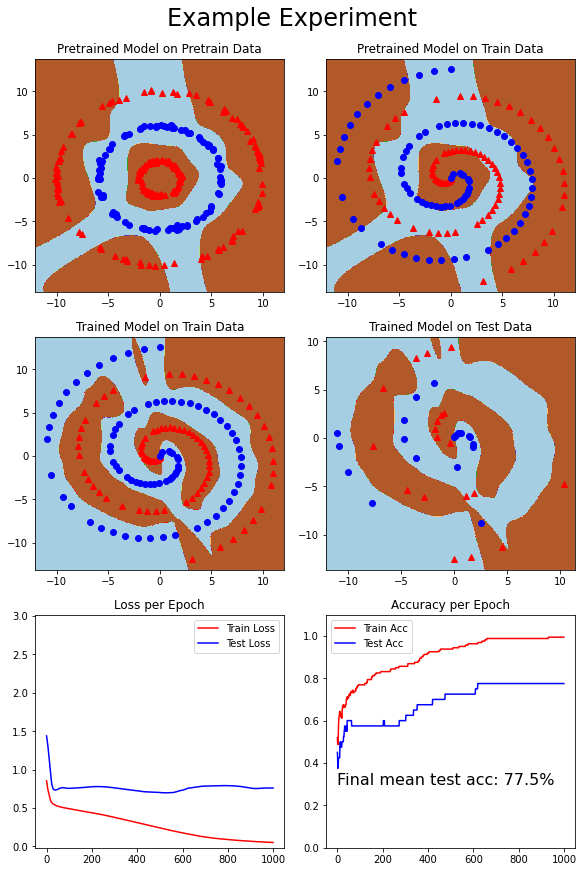

In [9]:
# Example experiment; you should copy this cell several times,
#   edit the kwargs, and save the figure outputs to your notebook.
kwargs = {
    "title": "Example Experiment",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 300,
    "n_train_epochs": 1000,
}

run_experiment(**kwargs)

## Understanding the Code (2 points)

1. In the provided code, the network outputs a real-valued tensor of shape `(N, 2)`. In the `run_one_epoch` function, we use a combination of `where`, `argmax`, and `torch.nn.CrossEntropyLoss`. How do these calculations work? You may want to look at the [documentation for the loss function](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

2. Read through the `run_experiment`, `pretrain_and_train`, and `plot_results` functions to understand how the figure is being built. In your own words, describe in general what the six panels show. What data is being used in which panels? 

1. We use **torch.where(y>0, 1, 0)** is to make the elements of targets to be 0 and 1 with the criterion y>0. We use **torch.argmax(output, dim =1) == binary_targets** to get the tensor with values 1(correct prediction) and 0(wrong prediction). Calculate **sum** and over the number of samples, we will get the accuracy.  
**torch.nn.CrossEntropyLoss()(output, binary_targets)**, output contains two classes 1 and 0. For each class we can get a loss with the function $∑_{i=1}^{n} -y_ilog(\hat{y_i}) - (1-y_i)log(1-\hat{y_i})$, n is the sample size and the $\hat{y_i}$ is the prediction value, using this, we can get a cross entropy loss.  
  
  
2. We initially use make__mulitiple_circles and make_spiral to geneate the pretrain and train data. Meanwhile, we use the pretrain data and train data to build the pretrained and trained models. In the first row, we use the pretrained model to classfiy the pretrain and train data repectively. In the second row, we use the trained model to classify the train and test data splited in **pretrain_and_train**. Because the result of each epoch including loss and accuracy is recorded(only train and test data), we get the loss plot of train and test loss using the trained model each epoch and get the the accuracy plot of train and test loss using the trained model each epoch in the last row. For the last epoch, we get the final test accuracy 77.5%.

## Experiments and Discussion (8 points)

The example experiment we provide has the following keyword arguments:

```
kwargs = {
    "title": "Example Experiment",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 300,
    "n_train_epochs": 1000,
}
```

For your experiments, you should change these values and rerun `run_experiment(**kwargs)` and track what happens. You can run as many or as few experiments as you want, but they should have unique `title` values (i.e., not "Example Experiment"), and your written answers to the following questions should reference the figures produced by specific experiments. That is, don't say "the model tends to overfit"; say "in my `Example #4` above, we can see that the model is overfitting because ...". You can copy the example experiment we provide into new Code cells, edit the kwargs, and run the cell to save the output to your notebook.

1. **Overfitting Experiments** (2 points). 

    Include at least two experiments that show the model overfitting.
    Describe what those experiments show and how you know the model is
    overfitting. What arguments had the most effect on whether your
    model overfits?

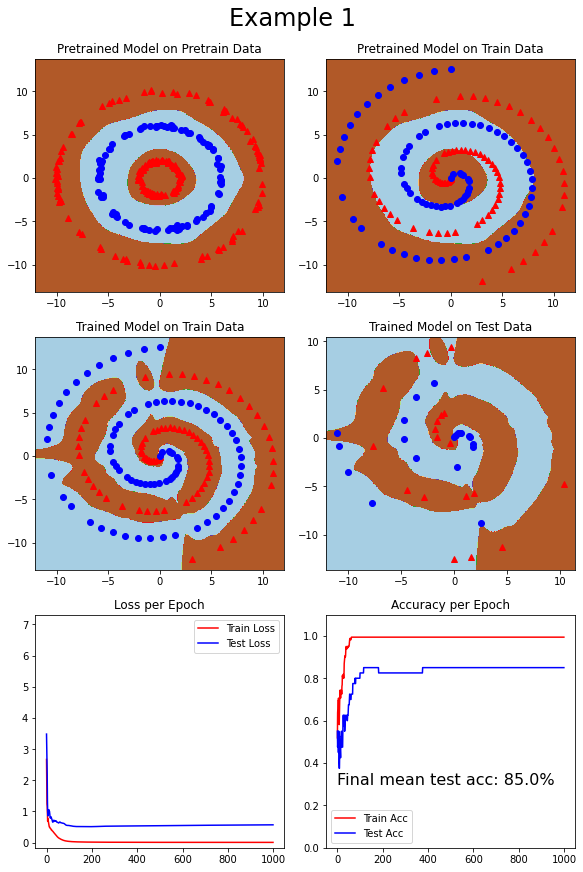

In [10]:
import os
device = torch.device("cuda")
kwargs = {
    "title": "Example 1",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 100],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 300,
    "n_train_epochs": 1000,
}

run_experiment(**kwargs)

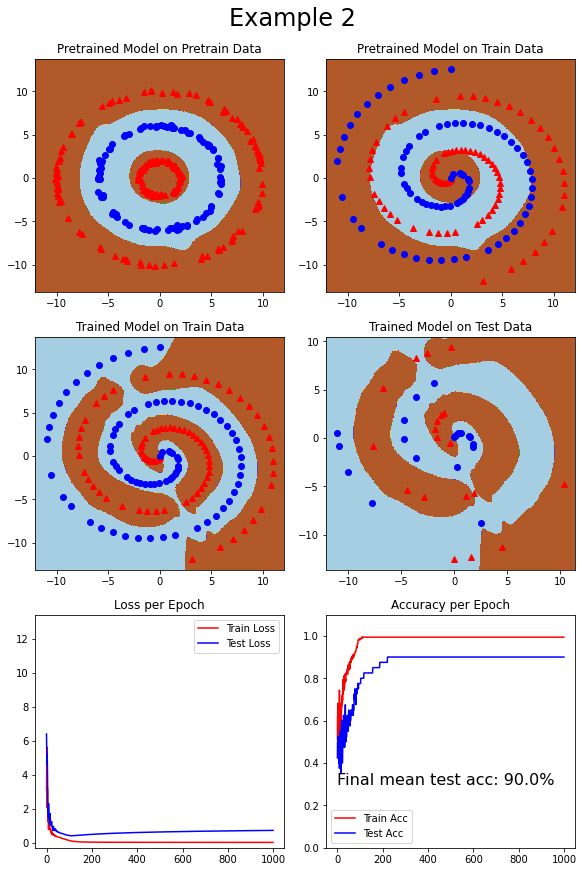

In [11]:
kwargs = {
    "title": "Example 2",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 1000],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 300,
    "n_train_epochs": 1000,
}

run_experiment(**kwargs)

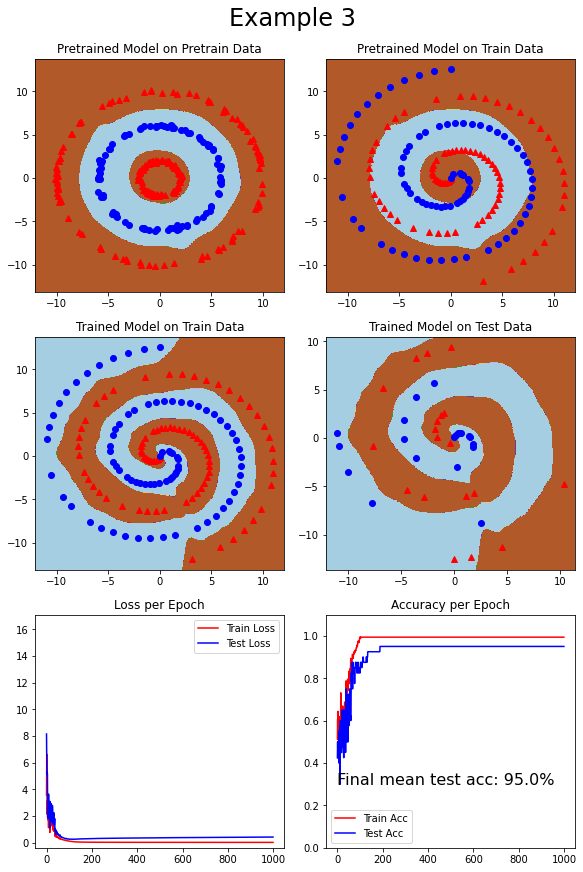

In [12]:
kwargs = {
    "title": "Example 3",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 1000],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 500,
    "n_train_epochs": 1000,
}

run_experiment(**kwargs)

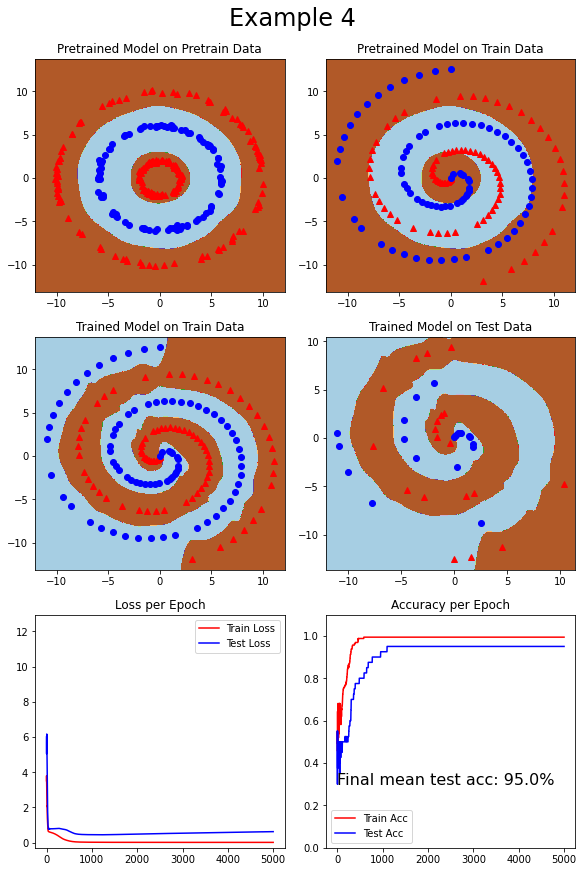

In [20]:
kwargs = {
    "title": "Example 4",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 1000],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 500,
    "n_train_epochs": 5000,
}

run_experiment(**kwargs)

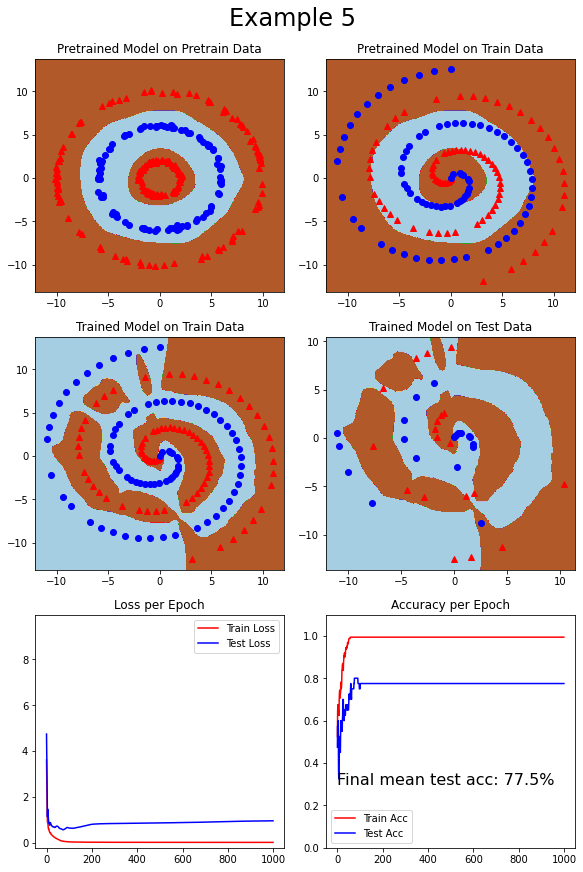

In [21]:
kwargs = {
    "title": "Example 5",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 100],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 1000,
    "n_train_epochs": 1000,
}

run_experiment(**kwargs)

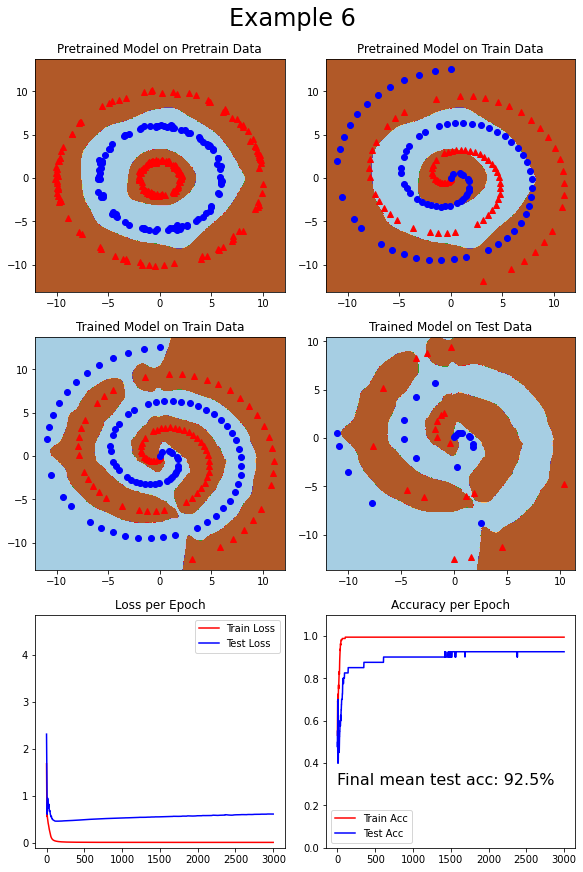

In [22]:
kwargs = {
    "title": "Example 6",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 100],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 3000,
}

run_experiment(**kwargs)

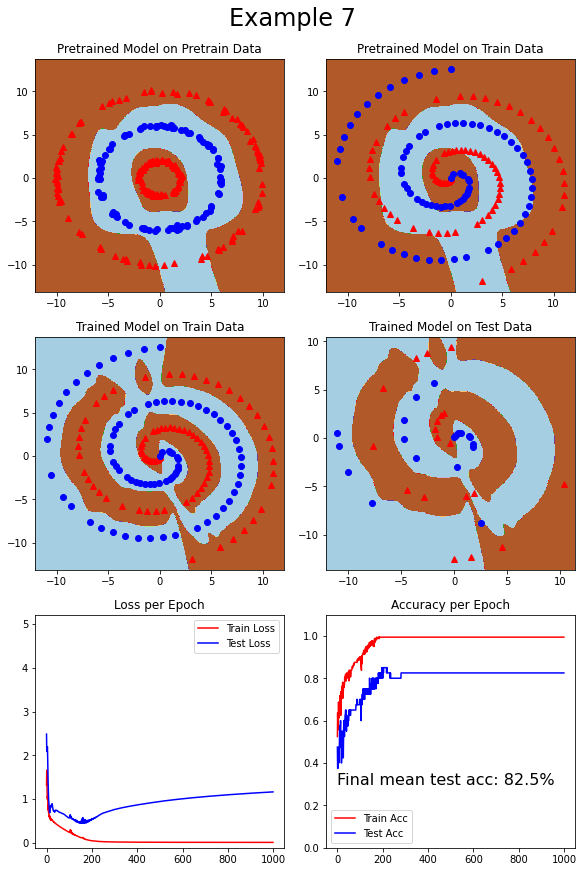

In [23]:
kwargs = {
    "title": "Example 7",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 1000],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 1000,
}

run_experiment(**kwargs)

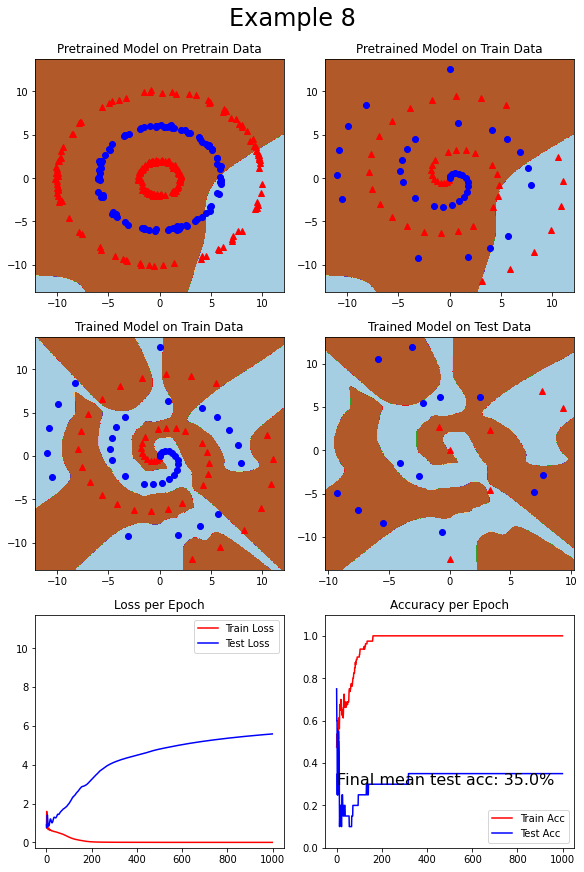

In [29]:
kwargs = {
    "title": "Example 8",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 50,
    "layer_sizes": [100, 100],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 0,
    "n_train_epochs": 1000,
}

run_experiment(**kwargs)

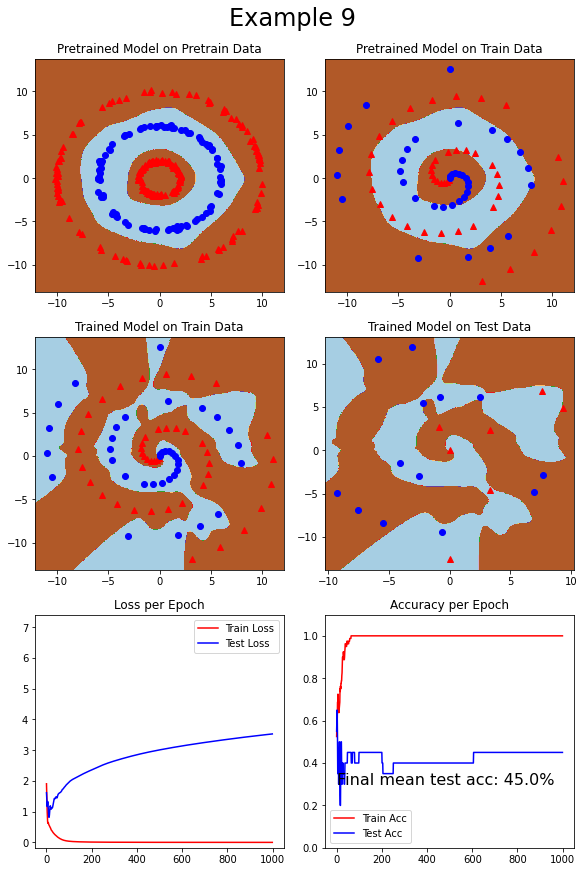

In [30]:
kwargs = {
    "title": "Example 9",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 50,
    "layer_sizes": [100, 100],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 1000,
}

run_experiment(**kwargs)

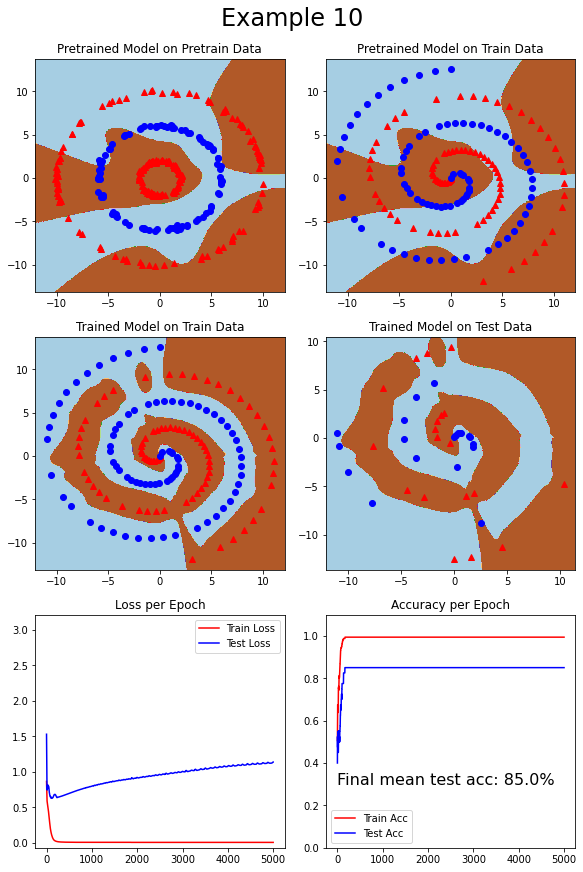

In [11]:
kwargs = {
    "title": "Example 10",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 100],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 50,
    "n_train_epochs": 5000,
}

run_experiment(**kwargs)

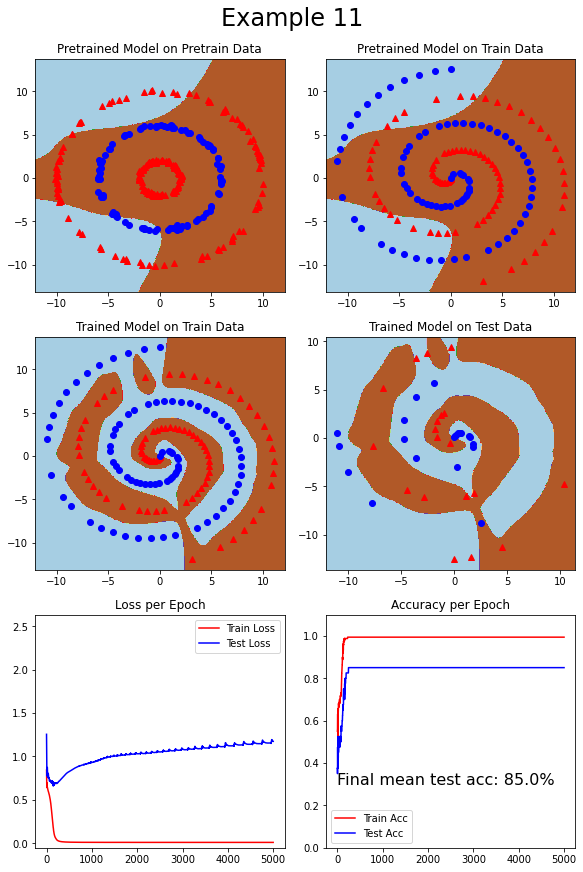

In [12]:
kwargs = {
    "title": "Example 11",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 100],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 10,
    "n_train_epochs": 5000,
}

run_experiment(**kwargs)

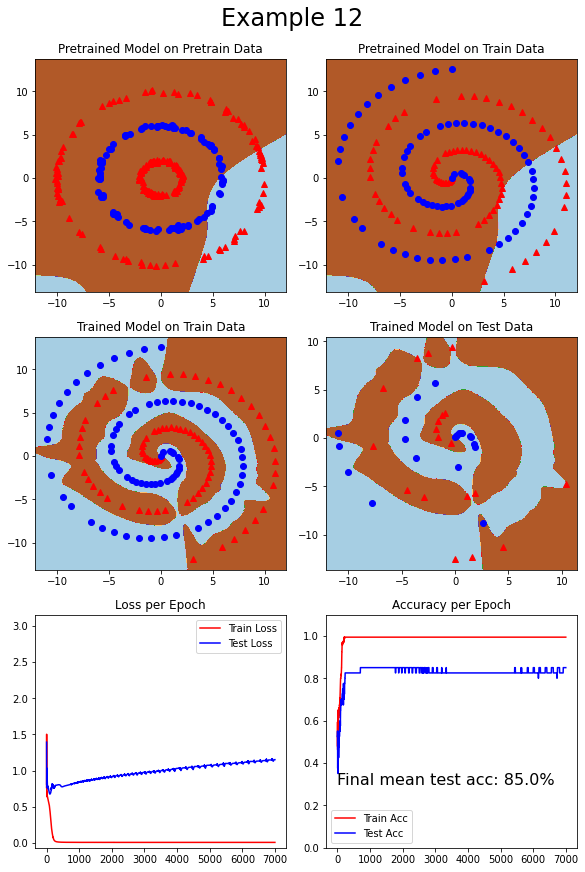

In [15]:
kwargs = {
    "title": "Example 12",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "examples_per_spiral": 100,
    "layer_sizes": [100, 100],
    "activation": torch.tanh,
    "learning_rate": 0.01,
    "n_pretrain_epochs": 0,
    "n_train_epochs": 7000,
}

run_experiment(**kwargs)

*Please put your "Overfitting Experiments" answer here*.  

Compare Example 6 and Exmple 7, the accuracy and loss go to steady finally. However, increase the size of hiddden layers, from 100 to 1000, the model is much more complicated, the accuracy goes down on the test data set. Therefore, there shoule be an overfitting. I think the number of hidden layers has the most effect.  

2. **Best Experiment** (3 points)

    Across all the experiments you ran, with which arguments did you achieve the highest "Final mean test acc"? What patterns led you to find these arguments? Which arguments had the largest impact on your experimental results? What was more difficult than you expected?

    Your answer should be at least two paragraphs and reference at least three different experiments you ran.

*Please put your "Best Experiment" answer here*  
The arguments of Example 3 achieve the best among my exams. I find increasing the number of layers properly will increase the accuracy and changing the learning rate and the number of pretrain epochs and train epochs will affect the runing time. I think the size of the hidden layers affect most. I think the trade-off between these parameters is difficult. They are dependent, even I find a relatively good value for the size of hidden layer, when I change other parameters, it may not be relatively good any more.


3. **Pretraining Experiments** (3 points)

    The point of pretraining is to get the model "started" with an easier task (rings) so it can more quickly learn the task we care about (spirals). You can control the amount of ring data, the amount of spiral data, and the number of epochs the model train on each. In your experiments, assume that all we care about is maximizing the final mean test set accuracy.

    Based on your experiments, **when does pretraining help? When does it hurt?**

    Your answer should be at least two paragraphs and reference at least three different experiments you ran.

*Please put your "Pretraining Experiments" answer here*  
From example 8 and 9, there are only 50 points for the train. When the train data is little, the pretraining can improve the accuracy, because in example 8 and 9 I set pretrain epochs to be 0 and 100, the accuracy improves from 35% to 45%.  
  
    
However, when the size of the train data is large enough, the pretrain process will only decrease the running time and cannot improve the accuracy. From example 10 and 11, we can easily find that, changing the number of pretrain epoches from 10 to 50 will not affect the final accuracy but the running time. Especially, for example 12, we even set the number of pretrain epoches to 10, we get the same final accuracy.